In [7]:
import color_quest

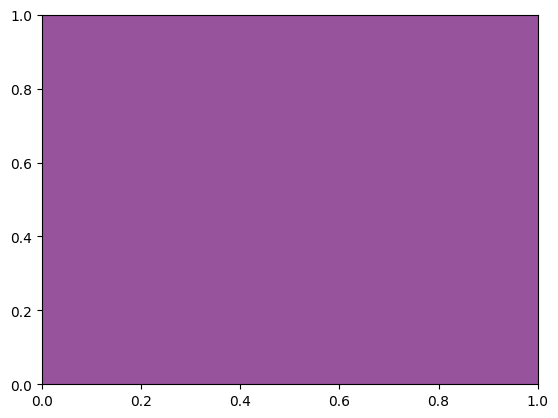

In [8]:
# create new question
Q0 = color_quest.Quest()

In [9]:
# show question
Q0.quest()

# trial and eval
print(f'{Q0.eval([127,127,127]) = }')

# number of trials
print(f'{Q0.n = }')
# trials
print(f'{Q0.trials = }')
# dists
print(f'{Q0.dists = }')


Trial #0
	 (R,G,B)?
Q0.eval([127,127,127]) = 58.83026432033091
Q0.n = 1
Q0.trials = [[127, 127, 127]]
Q0.dists = [58.83026432033091]
Trial #0
	 (R,G,B)?
Q0.eval([127,127,127]) = 58.83026432033091
Q0.n = 1
Q0.trials = [[127, 127, 127]]
Q0.dists = [58.83026432033091]


# ニュートン法で解く

trial#01	[255   0   0]	Error:235.98305023878305
trial#02	[  0 255   0]	Error:183.73350266078313
trial#03	[  0   0 255]	Error:241.32550631874784
trial#04	[251 192   7]	Error:175.62744660217547
trial#05	[190 233 185]	Error:136.8320137979413
trial#06	[137 180 132]	Error:45.033320996790806
trial#07	[116 159 111]	Error:8.660254037844387
trial#08	[111 154 106]	Error:0.0
Q.rgb_truth = (111, 154, 106)
trial#01	[255   0   0]	Error:235.98305023878305
trial#02	[  0 255   0]	Error:183.73350266078313
trial#03	[  0   0 255]	Error:241.32550631874784
trial#04	[251 192   7]	Error:175.62744660217547
trial#05	[190 233 185]	Error:136.8320137979413
trial#06	[137 180 132]	Error:45.033320996790806
trial#07	[116 159 111]	Error:8.660254037844387
trial#08	[111 154 106]	Error:0.0
Q.rgb_truth = (111, 154, 106)


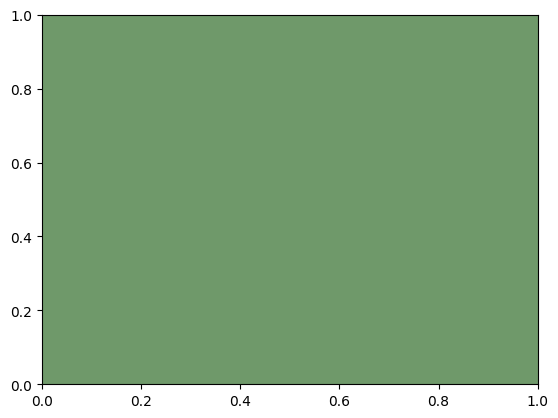

In [15]:
import numpy as np
import color_quest

rg = np.random.default_rng()

# まず距離を測る3次元ベクトル(r,g,b)を3つ作る
t = np.array([
    [255,0,0],
    [0,255,0],
    [0,0,255]
    ])

Q = color_quest.Quest()

class GPS:
    def __init__(self,t):
        self.t = t
        d = list()
        for i in range(3):
            d.append(Q.eval(t[:,i]))
        self.d = np.array(d)

    def F(self,x):
        f0 = (self.t[:,0]-x).T @ (self.t[:,0]-x) - self.d[0]**2
        f1 = (self.t[:,1]-x).T @ (self.t[:,1]-x) - self.d[1]**2
        f2 = (self.t[:,2]-x).T @ (self.t[:,2]-x) - self.d[2]**2
        return np.array([f0,f1,f2])

    def J(self,x):
        return -2 * (self.t-x)

gps = GPS(t)
for i in range(3):
    print(f'trial#{i+1:02d}\t{gps.t[:,i]}\tError:{gps.d[i]}')

EPS = 1e-20
e  = 1e+20
x = rg.integers(low=0,high=255,size=(3,))
while True:
    d = Q.eval(x)
    n = Q.n
    print(f'trial#{n:02d}\t{x}\tError:{d}')
    if d < EPS:
        break

    J_k_inv = np.linalg.inv(gps.J(x))
    F_k = gps.F(x)
    Delta_x = -J_k_inv @ F_k
    #"""
    for i in range(3):
        y = x + Delta_x
        if y[i] > 255:
            Delta_x = (256-x[i])/Delta_x[i] * Delta_x
        if y[i] < 0:
            Delta_x = -x[i]/Delta_x[i] * Delta_x
    #"""
    x_new = x + Delta_x
    e = np.linalg.norm(x_new - x)
    x = x_new.copy().clip(min=0,max=255).astype(int)
    """
    if e < EPS :
        break
    """
print(f'{Q.rgb_truth = }')


